Saving AirPassengers.csv to AirPassengers (2).csv


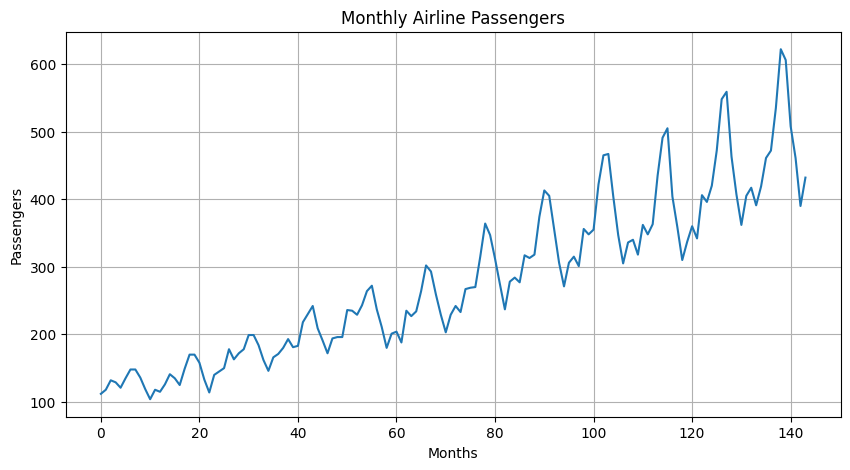

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


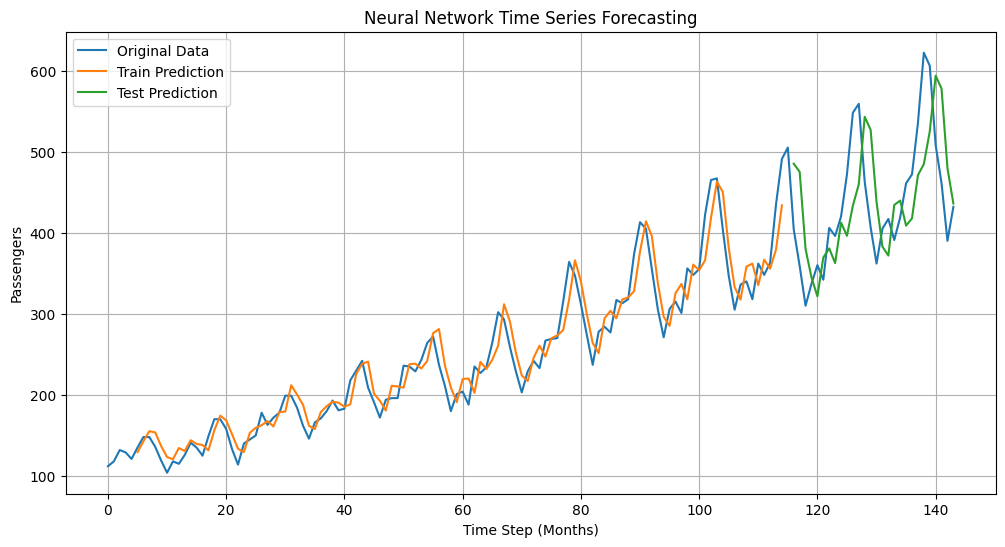

In [ ]:
# Install necessary libraries (if not already installed)
# !pip install tensorflow scikit-learn matplotlib pandas

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Upload the dataset
uploaded = files.upload()

# ✅ Correct filename here
df = pd.read_csv('AirPassengers.csv')  # Match the uploaded file name

# Plot original data
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'])  # Column name in the Kaggle version is '#Passengers'
plt.title('Monthly Airline Passengers')
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

# Normalize data
data = df['#Passengers'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_dataset(dataset, time_step=5):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_dataset(scaled_data, time_step)

# Split into train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=time_step, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(df['#Passengers'].values, label='Original Data')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='Train Prediction')
plt.plot(np.arange(time_step + len(train_predict) + 1, time_step + len(train_predict) + 1 + len(test_predict)), test_predict, label='Test Prediction')
plt.title('Neural Network Time Series Forecasting')
plt.xlabel('Time Step (Months)')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()
